### Advancing Clinical Decision Support in Bangla Healthcare: A Probabilistic and Deep Learning Approach for Multi-Disease Prediction

This notebook demonstrates a multi-class classification task using various machine learning models on a dataset containing symptoms and corresponding disease prognoses.

First, we load the dataset from an Excel file into a pandas DataFrame and display the first few rows to understand its structure.

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/cleaned_dataset_with_english_translation.xlsx'
df = pd.read_excel(file_path)

# Show the first few rows of the dataset to understand its structure
df.head()


,prognosis,শরীর_ব্যথা (Body_Pain),জ্বলুনি (Burning_Sensation),চুলকানি (Itching),অধিক_ক্ষুধা (Excessive_Hunger),অতিরিক্ত_মুত্রনিষ্কাসন (Frequent_Urination),চোখে_সমস্যা (Eye_Problems),অস্থিবাধা (Joint_Pain),জড়তা (Numbness),ওজন_বৃদ্ধি (Weight_Gain),...,নাকের_প্রদাহ (Nasal_Inflammation),কোষ্ঠকাঠিন্য (Constipation),নাড়ি_স্পন্দন_কমা (Pulse_Rate_Decrease),একটানা_হাঁচি (Continuous_Sneezing),ঠান্ডা (Cold),রক্তজমা (Blood_Clot),পুঁজ_ভরা_পিম্পল (Pus_Filled_Pimple),র‍্যাশ (Rashes),মানসিক_অস্থিরতা (Mental_Anxiety),মুখে_সাদা_দাগ (White_Spots_on_Mouth)
0,ফাঙ্গাস (Fungal Infection),1,1.0,1,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ফাঙ্গাস (Fungal Infection),1,0.0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ফাঙ্গাস (Fungal Infection),0,1.0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ফাঙ্গাস (Fungal Infection),0,0.0,1,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ফাঙ্গাস (Fungal Infection),1,1.0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


Next, we check for missing values in the dataset and print the count of missing values per column.

In [ ]:
# Check if there are any missing values in the dataset
missing_data = df.isnull().sum()

# Show the count of missing values per column
print(missing_data[missing_data > 0])


জ্বলুনি (Burning_Sensation)    1
অস্থিবাধা (Joint_Pain)         1
বুকজ্বালা (Heartburn)          1
dtype: int64


In [ ]:
# Separate features (X) and target (y)
X = df.drop("prognosis", axis=1)  # Assuming 'prognosis' is the target column
y = df["prognosis"]

# Convert all feature columns to binary (1 if the value is 1.0 or 1, else 0)
X = X.apply(lambda col: col.map(lambda x: 1 if x == 1.0 or x == 1 else 0))

# Check the first few rows of the updated features to ensure conversion
X.head()


,শরীর_ব্যথা (Body_Pain),জ্বলুনি (Burning_Sensation),চুলকানি (Itching),অধিক_ক্ষুধা (Excessive_Hunger),অতিরিক্ত_মুত্রনিষ্কাসন (Frequent_Urination),চোখে_সমস্যা (Eye_Problems),অস্থিবাধা (Joint_Pain),জড়তা (Numbness),ওজন_বৃদ্ধি (Weight_Gain),ওজন_কমা (Weight_Loss),...,নাকের_প্রদাহ (Nasal_Inflammation),কোষ্ঠকাঠিন্য (Constipation),নাড়ি_স্পন্দন_কমা (Pulse_Rate_Decrease),একটানা_হাঁচি (Continuous_Sneezing),ঠান্ডা (Cold),রক্তজমা (Blood_Clot),পুঁজ_ভরা_পিম্পল (Pus_Filled_Pimple),র‍্যাশ (Rashes),মানসিক_অস্থিরতা (Mental_Anxiety),মুখে_সাদা_দাগ (White_Spots_on_Mouth)
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The target variable 'prognosis' is categorical (disease names). We use Label Encoding to convert these categorical labels into numerical representations, which are required for training most machine learning models.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable 'prognosis'
y_encoded = label_encoder.fit_transform(y)

# Check the first few encoded labels
print(y_encoded[:10])

# Optionally, print the mapping of labels to categories
print("\nLabel Encoding Mapping:")
print(dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))))


[50 50 50 50 50 50 50 50 50 50]

Label Encoding Mapping:
{'(ভারটিগো) প্যারোয়মসাল পজিশনাল ভার্টিগো ((Vertigo) Paroxysmal Positional Vertigo)': 0, 'CCHFV (Crimean Congo Hemorrhagic Fever)': 1, 'অস্টিওআর্থারাইটিস (Osteoarthritis)': 2, 'অ্যালকোহলিক হেপাটাইটিস (Alcoholic Hepatitis)': 3, 'আমাশয় (Dysentery)': 4, 'আলসার (Ulcer)': 5, 'ইনফ্লুয়েঞ্জা (Influenza)': 6, 'ইমপেটিগো (Impetigo)': 7, 'উচ্চ রক্তচাপ (High Blood Pressure)': 8, 'এইডস (AIDS)': 9, 'এনসেফালাইটিস (Encephalitis)': 10, 'এপিলেপসি (Epilepsy)': 11, 'এলার্জি (Allergy)': 12, 'ওটিটিস মিডিয়া (Otitis Media)': 13, 'ওষুধের প্রতিক্রিয়া (Drug Reaction)': 14, 'কলেরা (Cholera)': 15, 'কুষ্ঠ (Leprosy)': 16, 'কোষ্ঠকাঠিন্য (Constipation)': 17, 'ক্যান্সার (Cancer)': 18, 'ক্রনিক কোলেস্টেসিস (Chronic Cholestasis)': 19, 'গলগণ্ড (Goiter)': 20, 'গুটিবসন্ত (Smallpox)': 21, 'গ্যাস্ট্রোএন্টেরাইটিস (Gastroenteritis)': 22, 'গ্লসাইটিস (Glossitis)': 23, 'গ্লুকোমা (Glaucoma)': 24, 'চিকুনগুনিয়া (Chikungunya)': 25, 'চোখ ওঠা (Conjunctivitis)': 26, 'ছানি (Catar

To understand the distribution of the different diseases in our dataset, we plot a histogram of the encoded target variable. This helps visualize the class balance.

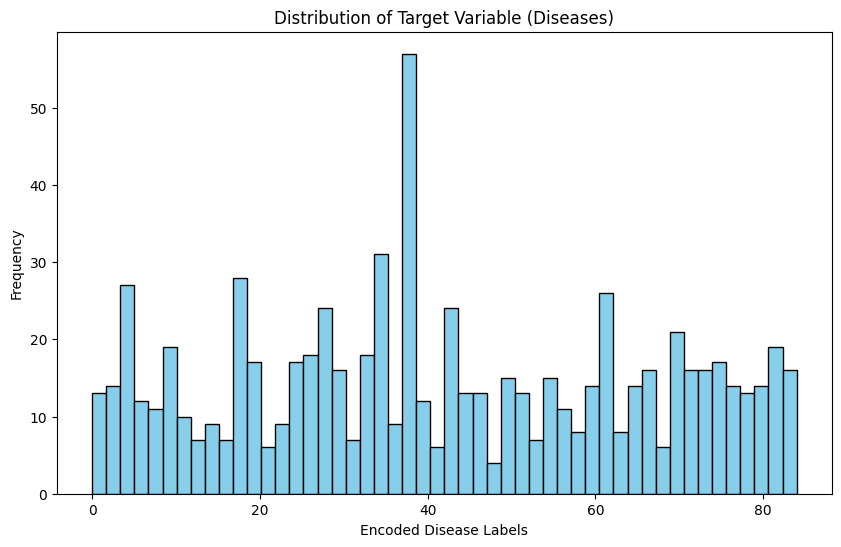

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Plot the distribution of the target variable (y_encoded)
plt.figure(figsize=(10, 6))
plt.hist(y_encoded, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Target Variable (Diseases)')
plt.xlabel('Encoded Disease Labels')
plt.ylabel('Frequency')
plt.show()

We then separate the features (symptoms) from the target variable (prognosis). The feature columns are converted to a binary format (1 if the symptom is present, 0 otherwise) for compatibility with the models.

Before training the models, we split the dataset into training and testing sets. This allows us to train the model on a portion of the data and evaluate its performance on unseen data.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


X_train shape: (605, 172), X_test shape: (152, 172)
y_train shape: (605,), y_test shape: (152,)


### MLP-01

Here, we define and train a Multi-Layer Perceptron (MLP) model with one hidden layer and ReLU activation. We then evaluate its performance using various metrics including Top-1, Top-3, and Top-5 accuracy, as well as precision, recall, and F1-score. A learning curve is also plotted to visualize the model's performance with increasing training data size.

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.0187 - loss: 4.4300 - val_accuracy: 0.1118 - val_loss: 4.3063
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2180 - loss: 4.2371 - val_accuracy: 0.3092 - val_loss: 4.1364
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4172 - loss: 4.0513 - val_accuracy: 0.4474 - val_loss: 3.9264
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5454 - loss: 3.8290 - val_accuracy: 0.5329 - val_loss: 3.6615
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6223 - loss: 3.5177 - val_accuracy: 0.5855 - val_loss: 3.3640
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6851 - loss: 3.1488 - val_accuracy: 0.6118 - val_loss: 3.0548
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7483 - loss: 2.7983 - val_accuracy: 0.6842 - val_loss: 2.7465
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7512 - loss: 2.5013 - val_accuracy: 0.7434 - val_loss: 2.4416
Ep

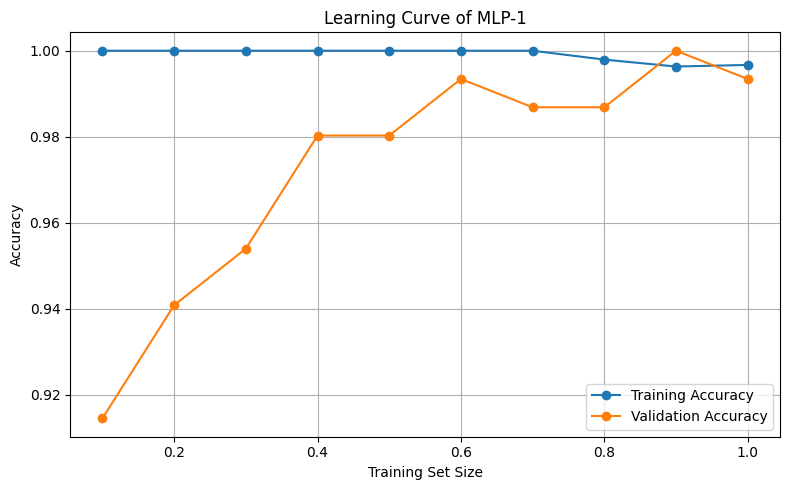

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, classification_report
# Number of unique classes in y_train
output_dim = len(np.unique(y_train))  # Output dimension (number of classes)

# Function to create the MLP model (one hidden layer, ReLU activation)
def create_mlp_model(input_dim, output_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))  # Single Hidden Layer with 64 neurons
    model.add(Dense(output_dim, activation='softmax'))  # Output Layer with softmax activation for multiclass classification
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize the MLP model
model = create_mlp_model(input_dim=X_train.shape[1], output_dim=output_dim)

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test data
y_pred_proba = model.predict(X_test)

# Convert probabilities to class predictions (0 or 1)
y_pred = np.argmax(y_pred_proba, axis=1)

# Calculate Top-1 Accuracy (standard accuracy)
top_1_accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Top-1 Accuracy: {top_1_accuracy:.2f}%")
# Top-K Accuracy function
def top_k_accuracy(y_test, y_pred_proba, k=3):
    top_k_predictions = np.argsort(y_pred_proba, axis=1)[:, -k:]  # Get top k predicted class indices
    correct_predictions = 0

    for i in range(len(y_test)):
        if y_test[i] in top_k_predictions[i]:
            correct_predictions += 1

    return correct_predictions / len(y_test) * 100

# Optional: Top-3 Accuracy (if you want it)
top_3_accuracy = top_k_accuracy(y_test, y_pred_proba, k=3)
print(f"Top-3 Accuracy: {top_3_accuracy:.2f}%")

# Optional: Top-5 Accuracy
top_5_accuracy = top_k_accuracy(y_test, y_pred_proba, k=5)
print(f"Top-5 Accuracy: {top_5_accuracy:.2f}%")

# Calculate Precision, Recall, F1 Score (Micro and Macro averages)
precision_micro, recall_micro, f1_micro, _ = precision_recall_fscore_support(
    y_test, y_pred, average='micro', zero_division=0
)
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(
    y_test, y_pred, average='macro', zero_division=0
)

print("\nMetrics (Micro Average):")
print(f"Precision (Micro): {precision_micro:.4f}")
print(f"Recall (Micro): {recall_micro:.4f}")
print(f"F1 Score (Micro): {f1_micro:.4f}")

print("\nMetrics (Macro Average):")
print(f"Precision (Macro): {precision_macro:.4f}")
print(f"Recall (Macro): {recall_macro:.4f}")
print(f"F1 Score (Macro): {f1_macro:.4f}")
# Function to plot the learning curve
def plot_learning_curve(model, X_train, y_train, X_test, y_test, batch_size=32, epochs=20):
    train_sizes = np.linspace(0.1, 1.0, 10)  # Create an array of training set sizes (from 10% to 100%)
    train_scores = []
    val_scores = []

    for train_size in train_sizes:
        # Subset the training data based on the current size
        current_size = int(train_size * len(X_train))
        X_train_sub, y_train_sub = X_train[:current_size], y_train[:current_size]

        # Train the model on the current subset of data
        model.fit(X_train_sub, y_train_sub, epochs=epochs, batch_size=batch_size, verbose=0)

        # Evaluate the model on training and test sets
        train_accuracy = model.evaluate(X_train_sub, y_train_sub, verbose=0)[1]
        val_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]

        train_scores.append(train_accuracy)
        val_scores.append(val_accuracy)

    # Plotting the learning curve
    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_scores, 'o-', label='Training Accuracy')
    plt.plot(train_sizes, val_scores, 'o-', label='Validation Accuracy')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curve of MLP-1')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot learning curve
plot_learning_curve(model, X_train, y_train, X_test, y_test, batch_size=32, epochs=20)


### MLP-03

This section defines and trains an MLP model with two hidden layers and Tanh activation. Similar to the previous model, its performance is evaluated using various metrics, and a learning curve is plotted.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.0462 - loss: 4.3913 - val_accuracy: 0.2237 - val_loss: 4.1851
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4110 - loss: 4.0314 - val_accuracy: 0.4737 - val_loss: 3.8680
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6380 - loss: 3.6655 - val_accuracy: 0.5395 - val_loss: 3.5159
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6713 - loss: 3.2734 - val_accuracy: 0.5789 - val_loss: 3.1430
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6817 - loss: 2.8451 - val_accuracy: 0.6447 - val_loss: 2.7585
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7434 - loss: 2.4027 - val_accuracy: 0.6776 - val_loss: 2.3820
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7732 - loss: 1.9906 - val_accuracy: 0.7237 - val_loss: 2.0425
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8466 - loss: 1.6545 - val_accuracy: 0.7632 - val_loss

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Top-1 Accuracy: 97.37%
Top-3 Accuracy: 99.34%
Top-5 Accuracy: 99.34%

Metrics (Micro Average):
Precision (Micro): 0.9737
Recall (Micro): 0.9737
F1 Score (Micro): 0.9737

Metrics (Macro Average):
Precision (Macro): 0.9378
Recall (Macro): 0.9478
F1 Score (Macro): 0.9378


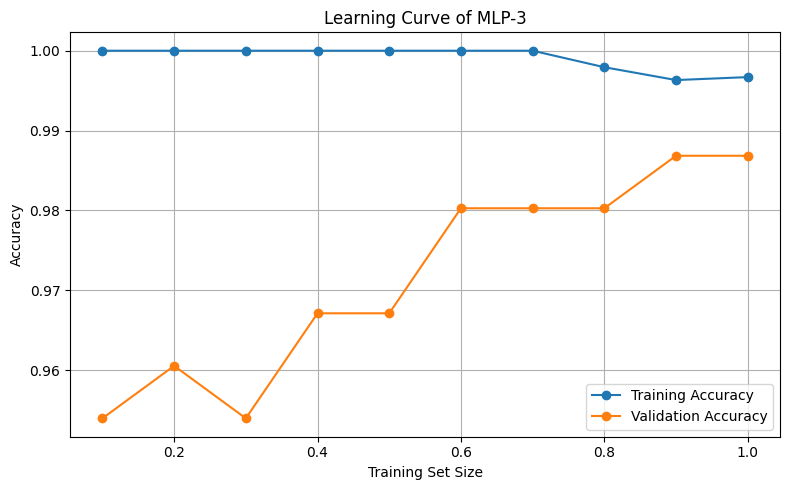

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, classification_report

# Function to create the MLP model (with two hidden layers and Tanh activation)
def create_mlp_model(input_dim, output_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='tanh'))  # Hidden Layer 1 with 64 neurons and Tanh activation
    model.add(Dense(64, activation='tanh'))  # Hidden Layer 2 with 64 neurons and Tanh activation
    model.add(Dense(output_dim, activation='softmax'))  # Output Layer with softmax activation for multiclass classification
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize the MLP model
model = create_mlp_model(input_dim=X_train.shape[1], output_dim=len(np.unique(y_train)))  # Number of classes

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test data
y_pred_proba = model.predict(X_test)

# Convert probabilities to class predictions (0 or 1)
y_pred = np.argmax(y_pred_proba, axis=1)

# Calculate Top-1 Accuracy (standard accuracy)
top_1_accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Top-1 Accuracy: {top_1_accuracy:.2f}%")

# Top-K Accuracy function
def top_k_accuracy(y_test, y_pred_proba, k=3):
    top_k_predictions = np.argsort(y_pred_proba, axis=1)[:, -k:]  # Get top k predicted class indices
    correct_predictions = 0

    for i in range(len(y_test)):
        if y_test[i] in top_k_predictions[i]:
            correct_predictions += 1

    return correct_predictions / len(y_test) * 100

# Calculate Top-3 Accuracy
top_3_accuracy = top_k_accuracy(y_test, y_pred_proba, k=3)
print(f"Top-3 Accuracy: {top_3_accuracy:.2f}%")

# Optional: Top-5 Accuracy
top_5_accuracy = top_k_accuracy(y_test, y_pred_proba, k=5)
print(f"Top-5 Accuracy: {top_5_accuracy:.2f}%")

# Calculate Precision, Recall, F1 Score (Micro and Macro averages)
precision_micro, recall_micro, f1_micro, _ = precision_recall_fscore_support(
    y_test, y_pred, average='micro', zero_division=0
)
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(
    y_test, y_pred, average='macro', zero_division=0
)

print("\nMetrics (Micro Average):")
print(f"Precision (Micro): {precision_micro:.4f}")
print(f"Recall (Micro): {recall_micro:.4f}")
print(f"F1 Score (Micro): {f1_micro:.4f}")

print("\nMetrics (Macro Average):")
print(f"Precision (Macro): {precision_macro:.4f}")
print(f"Recall (Macro): {recall_macro:.4f}")
print(f"F1 Score (Macro): {f1_macro:.4f}")

# Function to plot the learning curve
def plot_learning_curve(model, X_train, y_train, X_test, y_test, batch_size=32, epochs=20):
    train_sizes = np.linspace(0.1, 1.0, 10)  # Create an array of training set sizes (from 10% to 100%)
    train_scores = []
    val_scores = []

    for train_size in train_sizes:
        # Subset the training data based on the current size
        current_size = int(train_size * len(X_train))
        X_train_sub, y_train_sub = X_train[:current_size], y_train[:current_size]

        # Train the model on the current subset of data
        model.fit(X_train_sub, y_train_sub, epochs=epochs, batch_size=batch_size, verbose=0)

        # Evaluate the model on training and test sets
        train_accuracy = model.evaluate(X_train_sub, y_train_sub, verbose=0)[1]
        val_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]

        train_scores.append(train_accuracy)
        val_scores.append(val_accuracy)

    # Plotting the learning curve
    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_scores, 'o-', label='Training Accuracy')
    plt.plot(train_sizes, val_scores, 'o-', label='Validation Accuracy')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curve of MLP-3')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot learning curve
plot_learning_curve(model, X_train, y_train, X_test, y_test, batch_size=32, epochs=20)

### MLP-02

This cell defines and trains an MLP model with two hidden layers and ReLU activation, with a larger first hidden layer. Its performance is evaluated using various metrics, and a learning curve is plotted.

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.0379 - loss: 4.4071 - val_accuracy: 0.2368 - val_loss: 4.2459
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2761 - loss: 4.1823 - val_accuracy: 0.3421 - val_loss: 3.9518
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4060 - loss: 3.8078 - val_accuracy: 0.3355 - val_loss: 3.4976
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3668 - loss: 3.3662 - val_accuracy: 0.4211 - val_loss: 3.0181
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5677 - loss: 2.6005 - val_accuracy: 0.5329 - val_loss: 2.5143
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6326 - loss: 2.2048 - val_accuracy: 0.6842 - val_loss: 2.0144
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7910 - loss: 1.6238 - val_accuracy: 0.7697 - val_loss: 1.5953
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8592 - loss: 1.2483 - val_accuracy: 0.8684 - val_loss: 1.1979
Ep

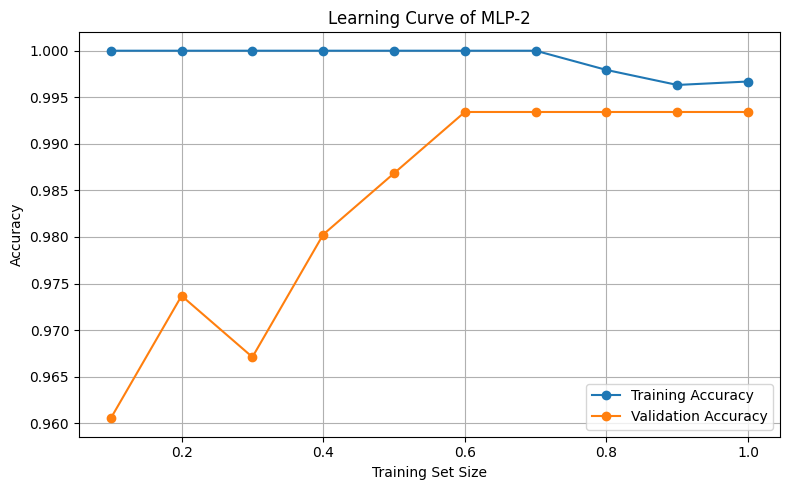

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, classification_report

# Function to create the MLP model
def create_mlp_model(input_dim, output_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))  # Hidden Layer 1
    model.add(Dense(64, activation='relu'))  # Hidden Layer 2
    model.add(Dense(output_dim, activation='softmax'))  # Output Layer with softmax activation for multiclass classification
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize the MLP model
model = create_mlp_model(input_dim=X_train.shape[1], output_dim=len(np.unique(y_train)))  # Number of classes

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test data
y_pred_proba = model.predict(X_test)

# Convert probabilities to class predictions (0 or 1)
y_pred = np.argmax(y_pred_proba, axis=1)

# Calculate Top-1 Accuracy (standard accuracy)
top_1_accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Top-1 Accuracy: {top_1_accuracy:.2f}%")

# Top-K Accuracy function
def top_k_accuracy(y_test, y_pred_proba, k=3):
    top_k_predictions = np.argsort(y_pred_proba, axis=1)[:, -k:]  # Get top k predicted class indices
    correct_predictions = 0

    for i in range(len(y_test)):
        if y_test[i] in top_k_predictions[i]:
            correct_predictions += 1

    return correct_predictions / len(y_test) * 100

# Calculate Top-3 Accuracy
top_3_accuracy = top_k_accuracy(y_test, y_pred_proba, k=3)
print(f"Top-3 Accuracy: {top_3_accuracy:.2f}%")

# Optional: Top-5 Accuracy
top_5_accuracy = top_k_accuracy(y_test, y_pred_proba, k=5)
print(f"Top-5 Accuracy: {top_5_accuracy:.2f}%")

# Calculate Precision, Recall, F1 Score (Micro and Macro averages)
precision_micro, recall_micro, f1_micro, _ = precision_recall_fscore_support(
    y_test, y_pred, average='micro', zero_division=0
)
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(
    y_test, y_pred, average='macro', zero_division=0
)

print("\nMetrics (Micro Average):")
print(f"Precision (Micro): {precision_micro:.4f}")
print(f"Recall (Micro): {recall_micro:.4f}")
print(f"F1 Score (Micro): {f1_micro:.4f}")

print("\nMetrics (Macro Average):")
print(f"Precision (Macro): {precision_macro:.4f}")
print(f"Recall (Macro): {recall_macro:.4f}")
print(f"F1 Score (Macro): {f1_macro:.4f}")

# Function to plot the learning curve
def plot_learning_curve(model, X_train, y_train, X_test, y_test, batch_size=32, epochs=20):
    train_sizes = np.linspace(0.1, 1.0, 10)  # Create an array of training set sizes (from 10% to 100%)
    train_scores = []
    val_scores = []

    for train_size in train_sizes:
        # Subset the training data based on the current size
        current_size = int(train_size * len(X_train))
        X_train_sub, y_train_sub = X_train[:current_size], y_train[:current_size]

        # Train the model on the current subset of data
        model.fit(X_train_sub, y_train_sub, epochs=epochs, batch_size=batch_size, verbose=0)

        # Evaluate the model on training and test sets
        train_accuracy = model.evaluate(X_train_sub, y_train_sub, verbose=0)[1]
        val_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]

        train_scores.append(train_accuracy)
        val_scores.append(val_accuracy)

    # Plotting the learning curve
    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_scores, 'o-', label='Training Accuracy')
    plt.plot(train_sizes, val_scores, 'o-', label='Validation Accuracy')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curve of MLP-2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot learning curve
plot_learning_curve(model, X_train, y_train, X_test, y_test, batch_size=32, epochs=20)


### Naive Bayes

Finally, we train and evaluate a Gaussian Naive Bayes model on the dataset. The performance metrics and learning curve are also presented for this model.

Top-1 Accuracy: 97.37%
Top-3 Accuracy: 98.68%
Top-5 Accuracy: 98.68%

Metrics (Micro Average):
Precision (Micro): 0.9737
Recall (Micro): 0.9737
F1 Score (Micro): 0.9737

Metrics (Macro Average):
Precision (Macro): 0.9578
Recall (Macro): 0.9545
F1 Score (Macro): 0.9520


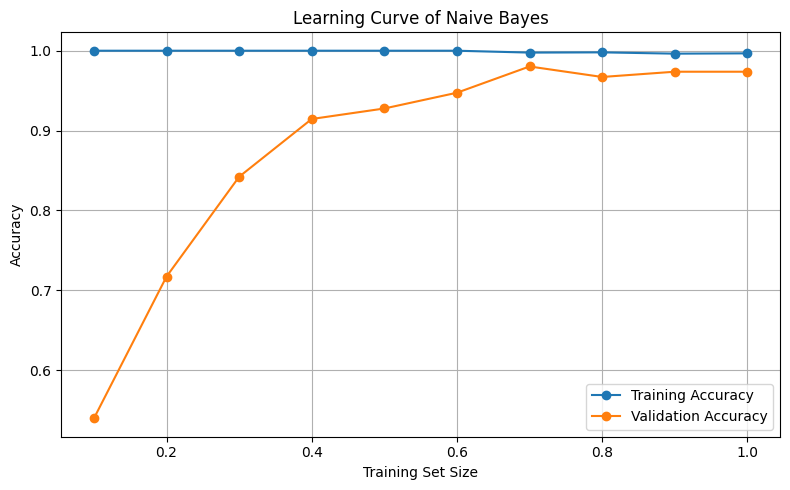

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt


y_train_class_indices = y_train
y_test_class_indices = y_test

# Initialize the Naive Bayes model (GaussianNB for continuous data)
model = GaussianNB()

# Train the model
model.fit(X_train, y_train_class_indices)  # Training on class indices

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Top-1 Accuracy (standard accuracy)
top_1_accuracy = accuracy_score(y_test_class_indices, y_pred) * 100
print(f"Top-1 Accuracy: {top_1_accuracy:.2f}%")

# Calculate Top-3 Accuracy
top_3_accuracy = top_k_accuracy(y_test_class_indices, model.predict_proba(X_test), k=3)
print(f"Top-3 Accuracy: {top_3_accuracy:.2f}%")

# Optional: Top-5 Accuracy
top_5_accuracy = top_k_accuracy(y_test_class_indices, model.predict_proba(X_test), k=5)
print(f"Top-5 Accuracy: {top_5_accuracy:.2f}%")

# Calculate Precision, Recall, F1 Score (Micro and Macro averages)
precision_micro, recall_micro, f1_micro, _ = precision_recall_fscore_support(
    y_test_class_indices, y_pred, average='micro', zero_division=0
)
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(
    y_test_class_indices, y_pred, average='macro', zero_division=0
)

print("\nMetrics (Micro Average):")
print(f"Precision (Micro): {precision_micro:.4f}")
print(f"Recall (Micro): {recall_micro:.4f}")
print(f"F1 Score (Micro): {f1_micro:.4f}")

print("\nMetrics (Macro Average):")
print(f"Precision (Macro): {precision_macro:.4f}")
print(f"Recall (Macro): {recall_macro:.4f}")
print(f"F1 Score (Macro): {f1_macro:.4f}")

# Plot learning curve for Naive Bayes (although it may not be as useful since Naive Bayes doesn't require epochs)
def plot_learning_curve(model, X_train, y_train, X_test, y_test):
    train_sizes = np.linspace(0.1, 1.0, 10)  # Create an array of training set sizes (from 10% to 100%)
    train_scores = []
    val_scores = []

    for train_size in train_sizes:
        # Subset the training data based on the current size
        current_size = int(train_size * len(X_train))
        X_train_sub, y_train_sub = X_train[:current_size], y_train[:current_size]

        # Train the model on the current subset of data
        model.fit(X_train_sub, y_train_sub)

        # Evaluate the model on training and test sets
        train_accuracy = model.score(X_train_sub, y_train_sub)
        val_accuracy = model.score(X_test, y_test)

        train_scores.append(train_accuracy)
        val_scores.append(val_accuracy)

    # Plotting the learning curve
    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_scores, 'o-', label='Training Accuracy')
    plt.plot(train_sizes, val_scores, 'o-', label='Validation Accuracy')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve of Naive Bayes')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot learning curve
plot_learning_curve(model, X_train, y_train_class_indices, X_test, y_test_class_indices)